# Revolut Operations Challenge
## Reinaldo Sabbagh 

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns

In [3]:
#Import Documents Report
doc_reports=pd.read_csv('doc_reports.csv',index_col=0)

In [4]:
#Expand the properties column to individual columns for gender, nationality, document type...
a=doc_reports['properties'].map(eval)
b=a.apply(pd.Series)
doc_reports=pd.concat([doc_reports.drop(['properties'], axis=1), b], axis=1)

In [5]:
doc_reports.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,...,NaN,caution,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,...,NaN,clear,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,...,NaN,clear,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,...,NaN,clear,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,...,NaN,clear,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [6]:
#Import Facial Symilarity Report 
facial_reports=pd.read_csv('facial_similarity_reports.csv',index_col=0)

In [7]:
facial_reports.head()

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [8]:
#change dates from strings to dates in the Documents report and the Facial Similarity Report 
doc_reports['created_at'] = pd.to_datetime(doc_reports['created_at'])
doc_reports['date_of_expiry'] = pd.to_datetime(doc_reports['date_of_expiry'],errors='coerce')
doc_reports['created_at'] = doc_reports['created_at'].dt.strftime('%Y-%m-%d')
facial_reports['created_at'] = pd.to_datetime(facial_reports['created_at'])

In [9]:
doc_reports.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20,clear,NaN,NaN,...,NaN,caution,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20,clear,NaN,NaN,...,NaN,clear,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20,clear,NaN,NaN,...,NaN,clear,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20,clear,NaN,NaN,...,NaN,clear,Male,NaN,national_identity_card,NaT,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20,clear,NaN,NaN,...,NaN,clear,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [11]:
#Cheking the shape of the DataFrame
print('Document:',(doc_reports.shape))
print('Facial Similarity:',facial_reports.shape)

Document: (176404, 25)
Facial Similarity: (176404, 8)


In [197]:
print('Documents Results:')
print(doc_reports.result.value_counts(normalize=True))
print('Facial Similarity Results')
print(facial_reports.result.value_counts(normalize=True))

Documents Results:
clear       0.750561
consider    0.249439
Name: result, dtype: float64
Facial Similarity Results
clear       0.938113
consider    0.061887
Name: result, dtype: float64


In [215]:
# Calculate what percentages of "not clear" are from Image Integrity
doc_reports[doc_reports.result=='consider'].image_integrity_result.value_counts(normalize=True).hist

<bound method hist_series of consider    0.903209
clear       0.096791
Name: image_integrity_result, dtype: float64>

### Plots comparing the Documents Report and the Facial Similarity Report 

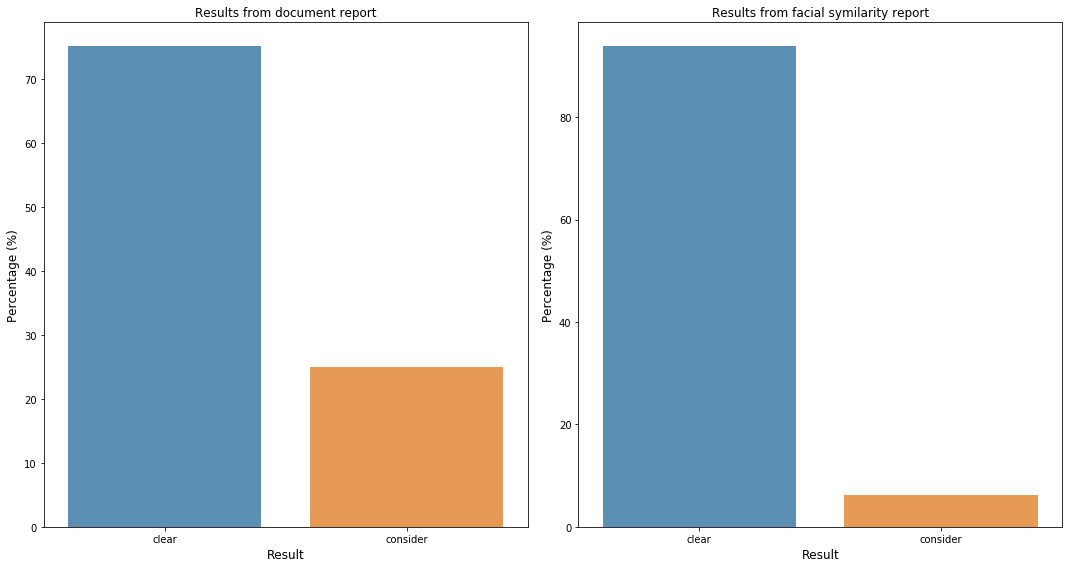

In [213]:

plt.figure(figsize=(15,8))
plt.subplot(121)
#plt.figure(figsize=(5,5))
doc_result_count  = doc_reports['result'].value_counts(normalize=True)
#plt.figure(figsize=(5,5))
sns.barplot(doc_result_count.index, doc_result_count.values*100, alpha=0.8)
plt.title('Results from document report',fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Result', fontsize=12)

plt.subplot(122)
facial_result_count  =facial_reports['result'].value_counts(normalize=True)
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(facial_result_count.index, facial_result_count.values*100, alpha=0.8)
plt.title('Results from facial symilarity report', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()
plt.show()

### Plots evaluating each of the Breakdowns of the Document Reports 

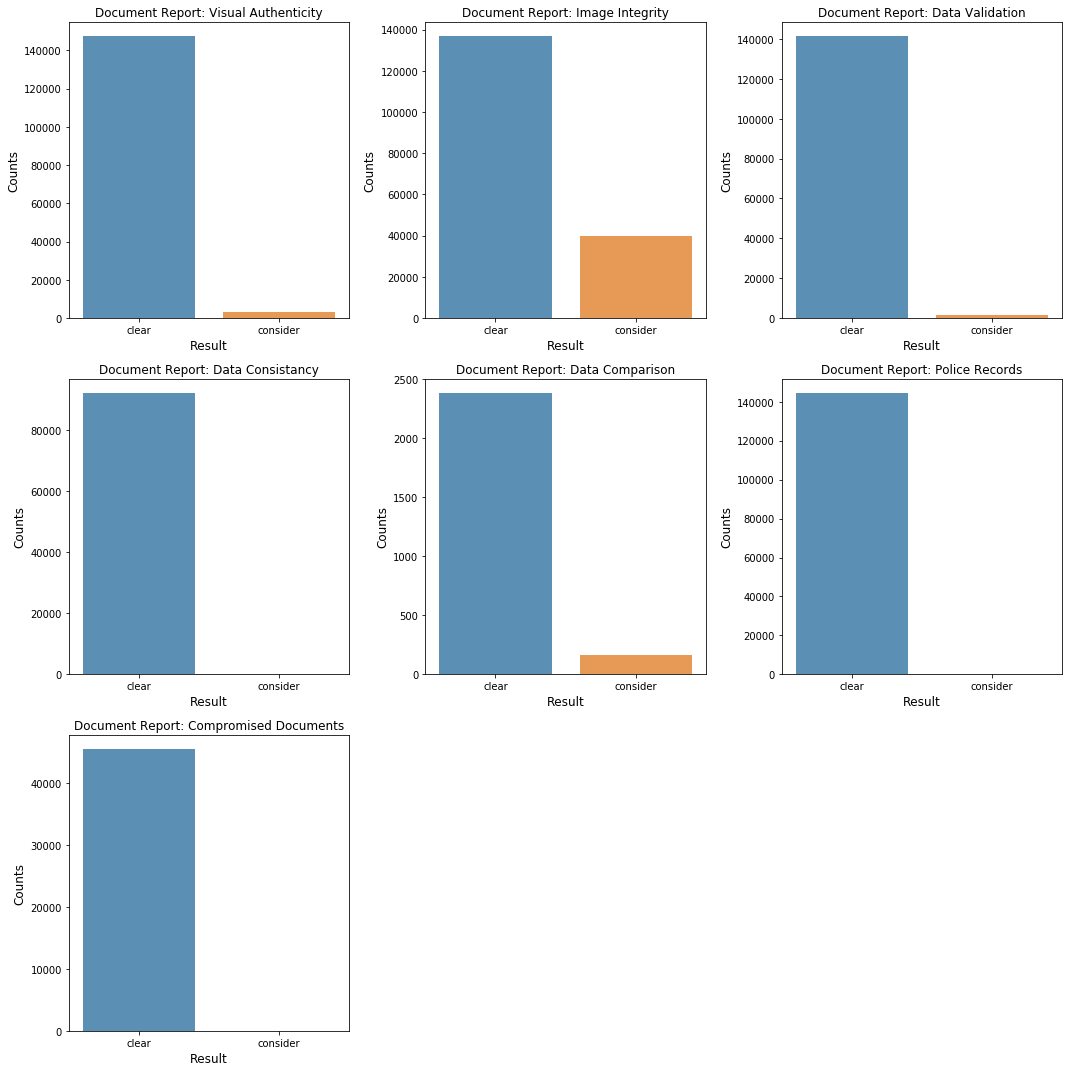

In [18]:

plt.figure(figsize=(15,15))

plt.subplot(331)
#plt.figure(figsize=(5,5))
doc_visual_authenticity_count  = doc_reports['visual_authenticity_result'].value_counts()
#plt.figure(figsize=(5,5))
sns.barplot(doc_visual_authenticity_count.index, doc_visual_authenticity_count.values, alpha=0.8)
plt.title('Document Report: Visual Authenticity')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)

plt.subplot(332)
doc_integrity_count  =doc_reports['image_integrity_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_integrity_count.index, doc_integrity_count.values, alpha=0.8)
plt.title('Document Report: Image Integrity')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()

plt.subplot(333)
doc_data_validation_count  =doc_reports['data_validation_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_data_validation_count.index, doc_data_validation_count.values, alpha=0.8)
plt.title('Document Report: Data Validation')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()

plt.subplot(334)
doc_data_consistancy_count  =doc_reports['data_consistency_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_data_consistancy_count.index, doc_data_consistancy_count.values, alpha=0.8)
plt.title('Document Report: Data Consistancy')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()

plt.subplot(335)
doc_data_comparison_count  =doc_reports['data_comparison_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_data_comparison_count.index, doc_data_comparison_count.values, alpha=0.8)
plt.title('Document Report: Data Comparison')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()
          
plt.subplot(336)
doc_police_count  =doc_reports['police_record_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_police_count.index, doc_police_count.values, alpha=0.8)
plt.title('Document Report: Police Records')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()

plt.subplot(337)
doc_compromise_count  =doc_reports['compromised_document_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_compromise_count.index, doc_compromise_count.values, alpha=0.8)
plt.title('Document Report: Compromised Documents')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()
plt.show()

In [160]:
#df.integrity=doc_integrity_count.consider
df1 = pd.DataFrame(data=doc_visual_authenticity_count)
df2 = pd.DataFrame(data=doc_integrity_count)
df3 = pd.DataFrame(data=doc_data_validation_count)
df4 = pd.DataFrame(data=doc_data_consistancy_count)
df5 = pd.DataFrame(data=doc_data_comparison_count )
df6 = pd.DataFrame(data=doc_police_count)
df7 = pd.DataFrame(data=doc_compromise_count)

frames=[df1,df2,df3,df4,df5,df6,df7]
df=pd.concat(frames,axis=1)
df.head()

,visual_authenticity_result,image_integrity_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result
clear,147260,136660,141335,92059,2386,144532,45483
consider,3030,39743,1639,170,162,25,23


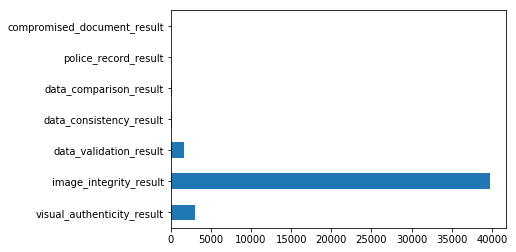

In [220]:
df.iloc[1].plot(kind='barh')

In [115]:
#Review in Detail where are the mistake in the breakdown of Image integrity
doc_reports_integrity_consider=doc_reports[doc_reports.image_integrity_result=='consider']
doc_reports_consider=doc_reports[doc_reports.result=='consider']

### Detail analysis of the breackdown of Image Integrity

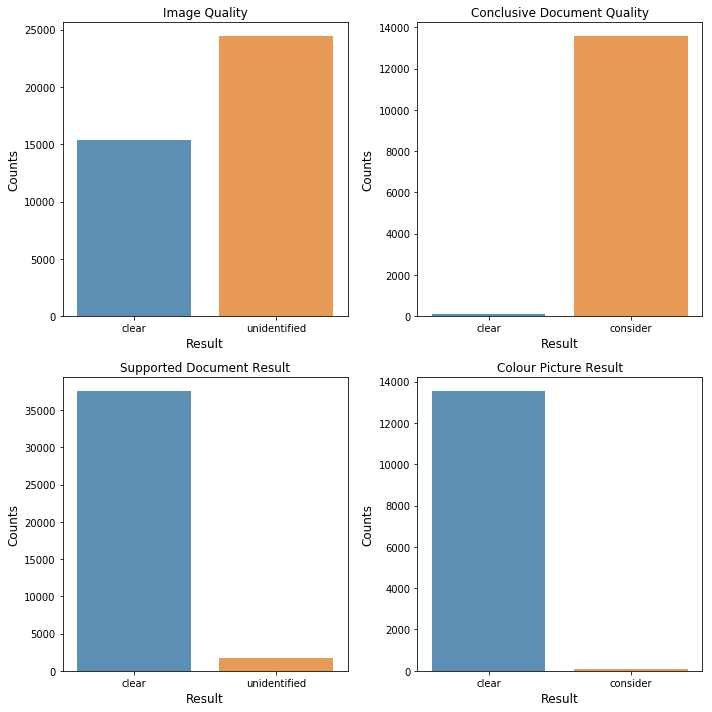

In [80]:
#doc_reports.result.value_counts().plot(kind='bar')
plt.figure(figsize=(10,10))
plt.subplot(221)
#plt.figure(figsize=(5,5))
doc_image_quality_count  = doc_reports_integrity_consider['image_quality_result'].value_counts(ascending=True)
#plt.figure(figsize=(5,5))
sns.barplot(doc_image_quality_count.index, doc_image_quality_count.values, alpha=0.8)
plt.title('Image Quality')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)

plt.subplot(222)
doc_conclusive_document_count  =doc_reports_integrity_consider['conclusive_document_quality_result'].value_counts(ascending=True)
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_conclusive_document_count .index, doc_conclusive_document_count .values, alpha=0.8)
plt.title('Conclusive Document Quality')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()

plt.subplot(223)
doc_supported_document_count  =doc_reports_integrity_consider['supported_document_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_supported_document_count .index, doc_supported_document_count .values, alpha=0.8)
plt.title('Supported Document Result')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()


plt.subplot(224)
doc_colour_picture_count  =doc_reports_integrity_consider['colour_picture_result'].value_counts()
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_colour_picture_count.index, doc_colour_picture_count.values, alpha=0.8)
plt.title('Colour Picture Result')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Result', fontsize=12)
plt.tight_layout()
plt.show()

## Analyzing what type of document is creating the most error 
### First Plot is all documents used 
### Second Plot is the documents that not clear in Image Integrity
### Third plot is all the document not clear

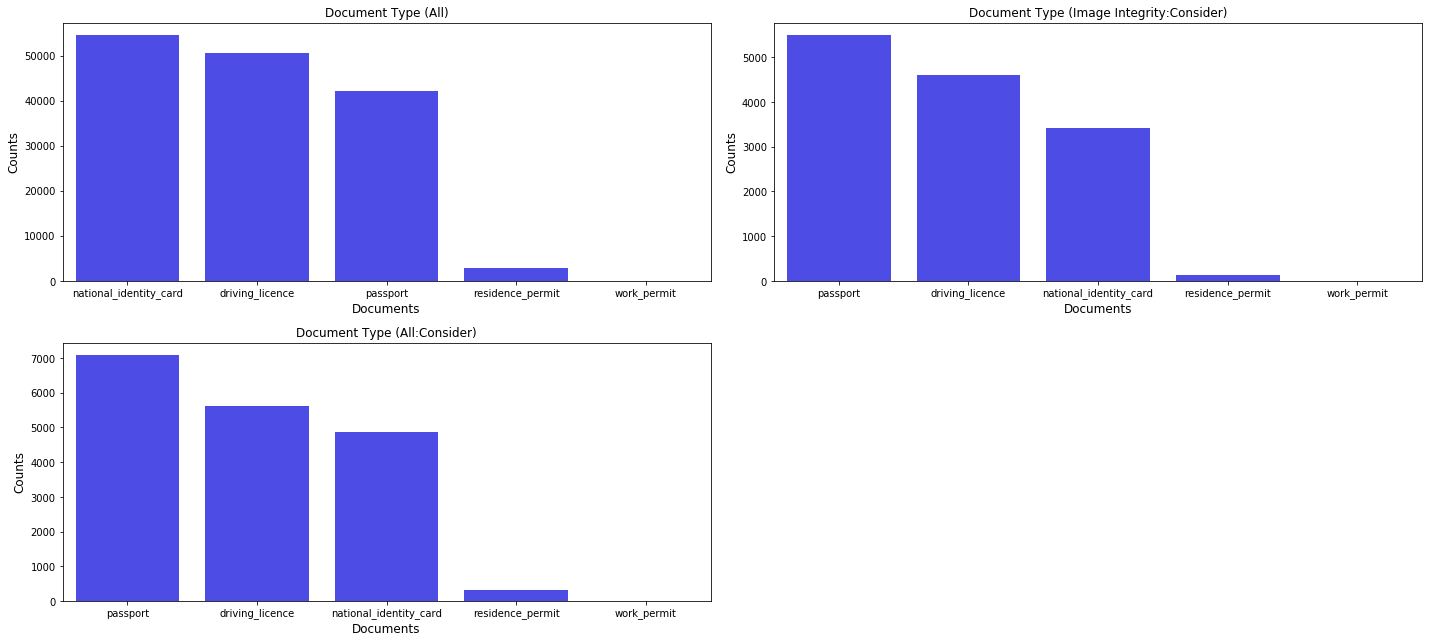

In [222]:
plt.figure(figsize=(20,13))
plt.subplot(321)
#plt.figure(figsize=(5,5))
doc_documen_type_count  = doc_reports['document_type'].value_counts().head(5)
#plt.figure(figsize=(5,5))
sns.barplot(doc_documen_type_count.index, doc_documen_type_count.values, alpha=0.8,color='blue')
plt.title('Document Type (All)')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Documents', fontsize=12)


plt.subplot(322)
doc_document_type_count_consider  =doc_reports_integrity_consider['document_type'].value_counts().head(5)
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_document_type_count_consider.index, doc_document_type_count_consider.values, alpha=0.8,color='blue')
plt.title('Document Type (Image Integrity:Consider)')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Documents', fontsize=12)
plt.tight_layout()

plt.subplot(323)
doc_document_type_count_consider_all  =doc_reports_consider['document_type'].value_counts().head(5)
#city_count = city_count[:10,]
#plt.figure(figsize=(5,5))
sns.barplot(doc_document_type_count_consider_all.index, doc_document_type_count_consider_all.values, alpha=0.8,color='blue')
plt.title('Document Type (All:Consider)')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Documents', fontsize=12)
plt.tight_layout()

plt.show()

In [191]:
doc_document_type_count_consider

passport                  5503
driving_licence           4595
national_identity_card    3422
residence_permit           141
work_permit                  1
Name: document_type, dtype: int64

In [217]:
doc_documen_type_count

national_identity_card    54613
driving_licence           50492
passport                  42228
residence_permit           2929
work_permit                  17
Name: document_type, dtype: int64

In [218]:
doc_document_type_count_consider_all

passport                  7094
driving_licence           5627
national_identity_card    4868
residence_permit           309
work_permit                  1
Name: document_type, dtype: int64

### Analyze the data by gender
There a 3 users that the gender is indicated as '8'

In [37]:
doc_test.gender.value_counts()

Male      78397
Female    41536
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64

In [35]:
doc_test.loc[doc_test['gender'] == '8']

,index,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,...,compromised_document_result,sub_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
26872,28189,2c481e67ea274fc199bf845b9a67b766,consider,clear,clear,clear,clear,2017-05-30 14:40:05+00:00,clear,NaN,...,NaN,suspected,8,NaN,driving_licence,2026-01-31,GBR,NaN,NaN,NaN
26897,28214,2c481e67ea274fc199bf845b9a67b766,consider,clear,clear,clear,clear,2017-05-30 14:40:05+00:00,clear,NaN,...,NaN,suspected,8,NaN,driving_licence,2026-01-31,GBR,NaN,NaN,NaN
31552,32947,ab68e6e7f28c4781a8e60f06a059c909,clear,clear,clear,clear,clear,2017-07-02 11:37:12+00:00,clear,NaN,...,NaN,clear,8,NaN,driving_licence,2024-09-30,GBR,NaN,NaN,NaN


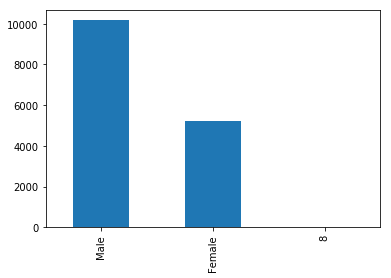

In [73]:
doc_test_consider.gender.value_counts().plot(kind='bar')

### Analyze data by country 

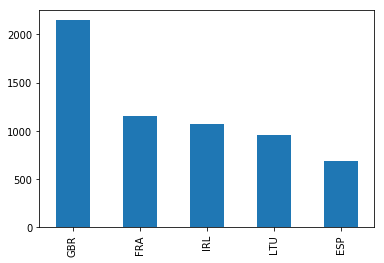

In [77]:
doc_test_consider.nationality.value_counts().head().plot(kind='bar')

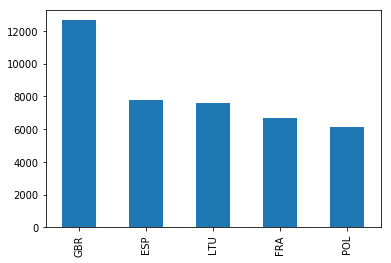

In [79]:
doc_test.nationality.value_counts().head().plot(kind='bar')

### Taking a Closing look of the Facial Similiraty Report 

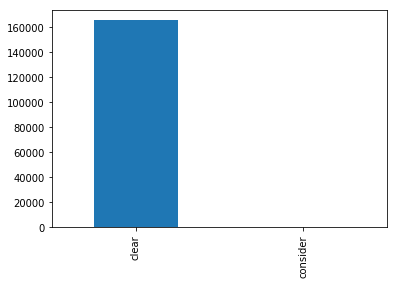

In [115]:
facial.face_comparison_result.value_counts().plot(kind='bar')

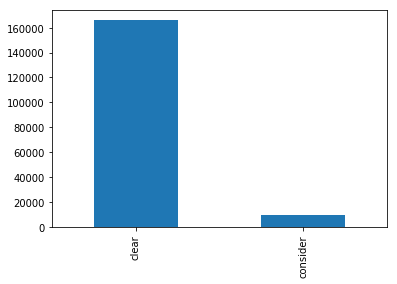

In [117]:
facial.facial_image_integrity_result.value_counts().plot(kind='bar')

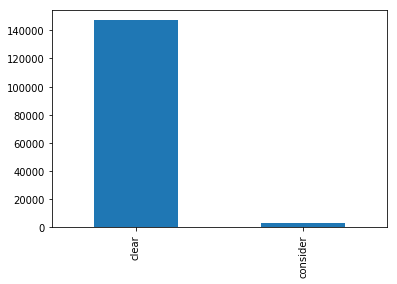

In [ ]:
facial.visual_authenticity_result.value_counts().plot(kind='bar')